<p style="background-color:#FFA07A;font-family:Arial, sans-serif;font-size:130%;color:black;text-align:center;border-radius:15px; padding:12px;border: 3px solid #FF6347;">Import Necessary Libraries</p>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/panic-disorder-detection-dataset/panic_disorder_dataset_training.csv')

<p style="background-color:#FFA07A;font-family:Arial, sans-serif;font-size:130%;color:black;text-align:center;border-radius:15px; padding:12px;border: 3px solid #FF6347;">Data Understanding</p>

In [3]:
df.shape

(100000, 17)

In [19]:
df.describe()

,Participant ID,Age,Panic Disorder Diagnosis
count,100000.000000,100000.000000,100000.00000
mean,50000.500000,41.454300,0.04285
std,28867.657797,13.839204,0.20252
min,1.000000,18.000000,0.00000
25%,25000.750000,29.000000,0.00000
50%,50000.500000,41.000000,0.00000
75%,75000.250000,53.000000,0.00000
max,100000.000000,65.000000,1.00000


In [4]:
df.sample(5)

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
41311,41312,39,Female,No,No,High,Shortness of breath,Mild,Moderate,Rural,Diabetes,Bipolar disorder,None,Exercise,Low,Diet,0
76714,76715,27,Male,No,No,Moderate,Chest pain,Mild,Moderate,Urban,Heart disease,Anxiety disorder,None,Socializing,Moderate,Sleep quality,0
74441,74442,50,Male,Yes,Yes,High,Fear of losing control,Moderate,Moderate,Urban,Diabetes,None,Drugs,Socializing,Low,Sleep quality,0
93633,93634,38,Male,No,Yes,High,Chest pain,Moderate,Moderate,Urban,Diabetes,Depressive disorder,Drugs,Socializing,Low,Diet,0
61734,61735,22,Male,No,Yes,High,Fear of losing control,Moderate,Significant,Rural,Asthma,Bipolar disorder,None,Exercise,Moderate,Sleep quality,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           100000 non-null  object
 11  Psychiatric History       100000 non-null  object
 12  Substance Use             100000 non-null  object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [6]:
columns = ['Gender','Family History','Personal History','Current Stressors','Symptoms','Severity','Impact on Life','Demographics','Medical History','Psychiatric History','Substance Use','Coping Mechanisms','Social Support','Lifestyle Factors']
for column in columns:
    print('No of Unique Values in',column,'=',df[column].nunique())

No of Unique Values in Gender = 2
No of Unique Values in Family History = 2
No of Unique Values in Personal History = 2
No of Unique Values in Current Stressors = 3
No of Unique Values in Symptoms = 5
No of Unique Values in Severity = 3
No of Unique Values in Impact on Life = 3
No of Unique Values in Demographics = 2
No of Unique Values in Medical History = 4
No of Unique Values in Psychiatric History = 4
No of Unique Values in Substance Use = 3
No of Unique Values in Coping Mechanisms = 4
No of Unique Values in Social Support = 3
No of Unique Values in Lifestyle Factors = 3


In [7]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

<p style="background-color:#FFA07A;font-family:Arial, sans-serif;font-size:130%;color:black;text-align:center;border-radius:15px; padding:12px;border: 3px solid #FF6347;">Data Preprocessing</p>

**Encode categorical columns using concept of nominal encoding**

In [8]:
df_No = df.copy()

# Define columns to encode
columns = ['Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 
           'Severity', 'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 
           'Substance Use', 'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']

# Create a dictionary to store mappings
mapping = {}

# Iterate over columns and encode categorical values
for column in columns:
    unique_values = df_No[column].unique()
    for i, value in enumerate(unique_values):
        mapping[value] = i

# Replace categorical values with encoded integers
df_No = df_No.replace(mapping)

In [9]:
df_No.head(2)

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,51,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0


<p style="background-color:#FFA07A;font-family:Arial, sans-serif;font-size:130%;color:black;text-align:center;border-radius:15px; padding:12px;border: 3px solid #FF6347;">Exploratory Data Analysis</p>


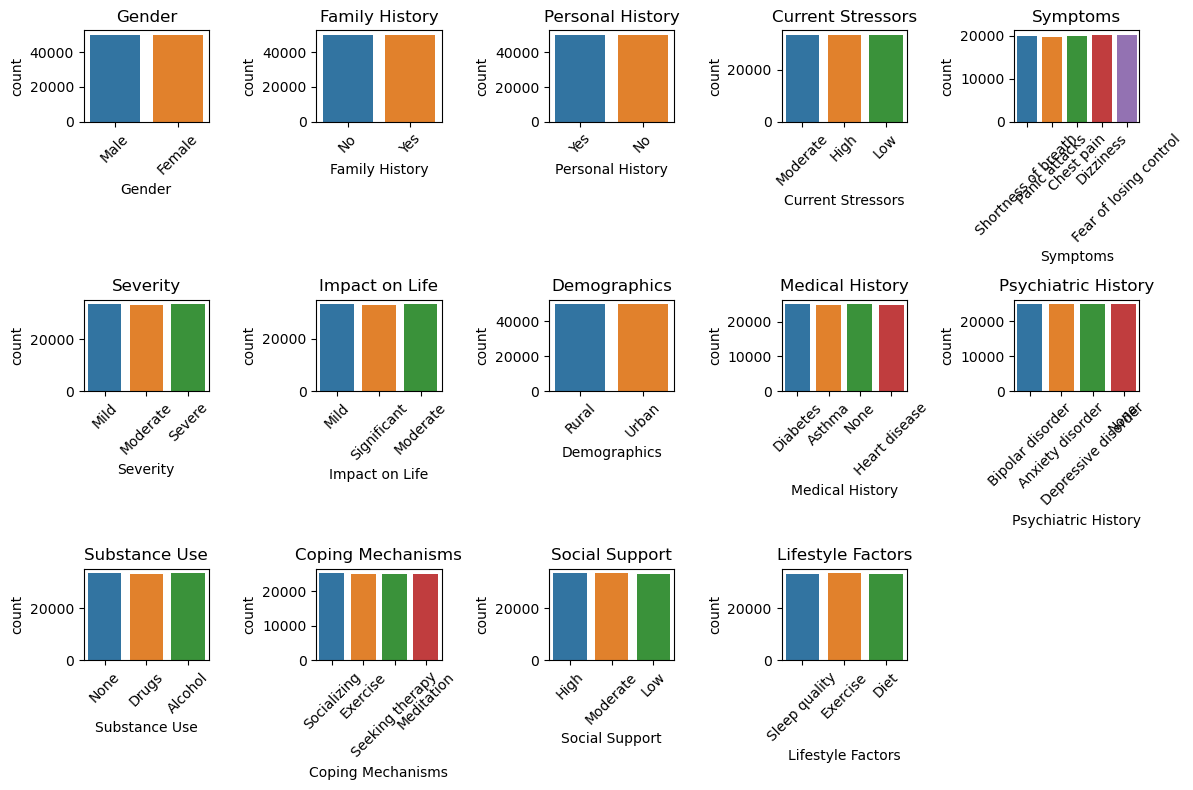

In [24]:
def plot_categorical_distribution(df, columns):
    plt.figure(figsize=(12, 8))
    for col in columns:
        plt.subplot(3, 5, columns.index(col) + 1)
        sns.countplot(x=col, data=df)
        plt.title(col)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
# Plot categorical distribution
plot_categorical_distribution(df, ['Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 
                                    'Severity', 'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 
                                    'Substance Use', 'Coping Mechanisms', 'Social Support', 'Lifestyle Factors'])


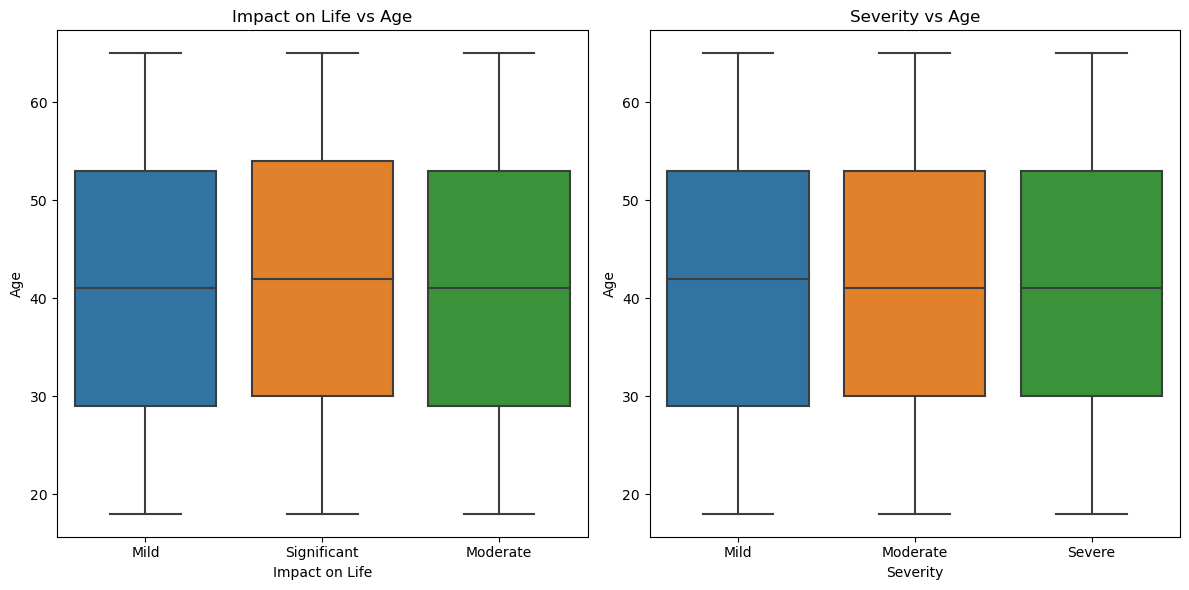

In [25]:
# Box plots for Impact on Life and Severity
def plot_boxplots(df):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Impact on Life', y='Age', data=df)
    plt.title('Impact on Life vs Age')
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Severity', y='Age', data=df)
    plt.title('Severity vs Age')
    plt.tight_layout()
    plt.show()
    
plot_boxplots(df)

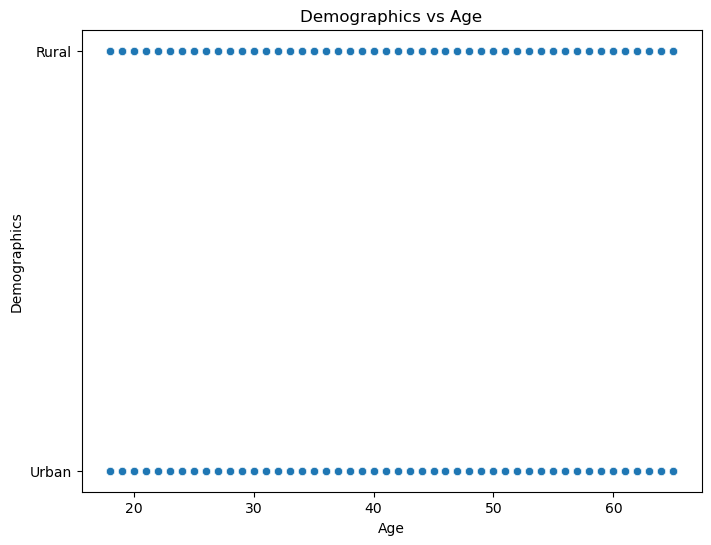

In [27]:
#Scatter plot for Demographics vs Age
def plot_scatter_demographics_age(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age', y='Demographics', data=df)
    plt.title('Demographics vs Age')
    plt.xlabel('Age')
    plt.ylabel('Demographics')
    plt.show()
    
# Plot scatter plot
plot_scatter_demographics_age(df)

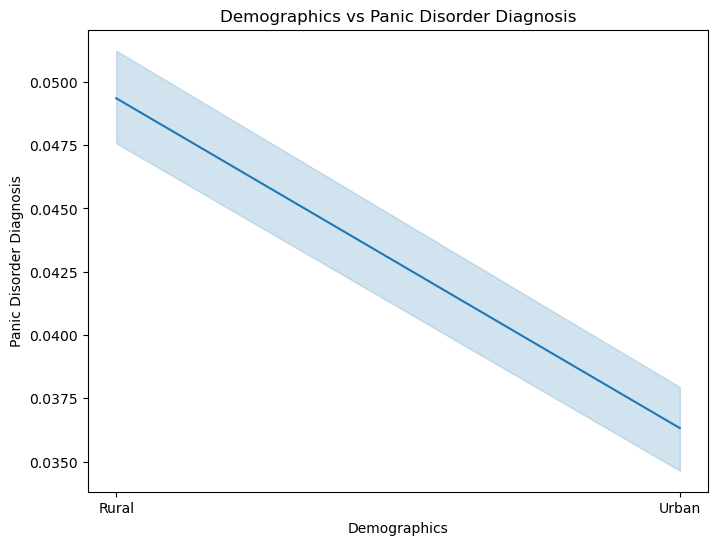

In [33]:
# Line plot for Demographics vs Panic Disorder Diagnosis
def plot_lineplot_demographics_diagnosis(df):
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='Demographics', y='Panic Disorder Diagnosis', data=df)
    plt.title('Demographics vs Panic Disorder Diagnosis')
    plt.xlabel('Demographics')
    plt.ylabel('Panic Disorder Diagnosis')
    plt.show()
    
# Line plot for Demographics vs Panic Disorder Diagnosis
plot_lineplot_demographics_diagnosis(df)

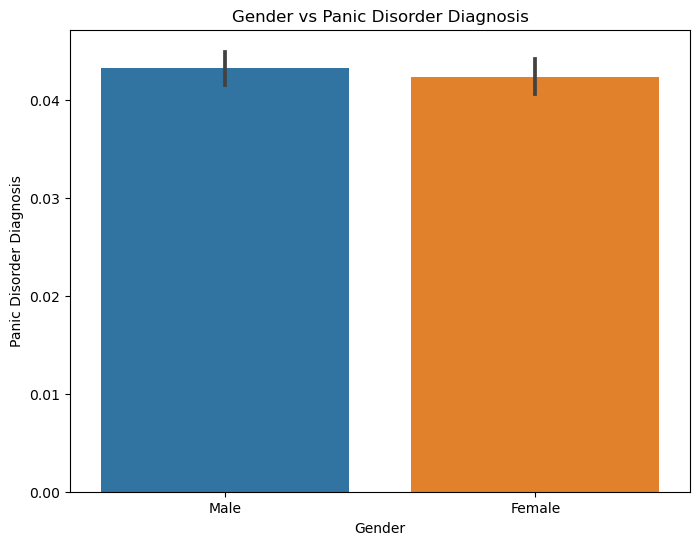

In [34]:
# Bar plot for Gender vs Panic Disorder Diagnosis
def plot_bar_gender_diagnosis(df):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Gender', y='Panic Disorder Diagnosis', data=df)
    plt.title('Gender vs Panic Disorder Diagnosis')
    plt.xlabel('Gender')
    plt.ylabel('Panic Disorder Diagnosis')
    plt.show()

# Bar plot for Gender vs Panic Disorder Diagnosis
plot_bar_gender_diagnosis(df)

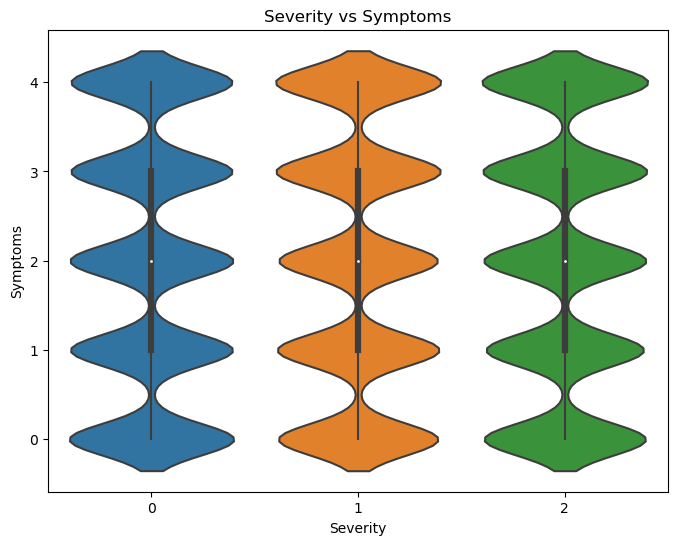

In [37]:
# Violin plot for Severity vs Symptoms
def plot_violinplot_severity_symptoms(df):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Severity', y='Symptoms', data=df)
    plt.title('Severity vs Symptoms')
    plt.xlabel('Severity')
    plt.ylabel('Symptoms')
    plt.show()
    
# Violin plot for Severity vs Symptoms
plot_violinplot_severity_symptoms(df_No)


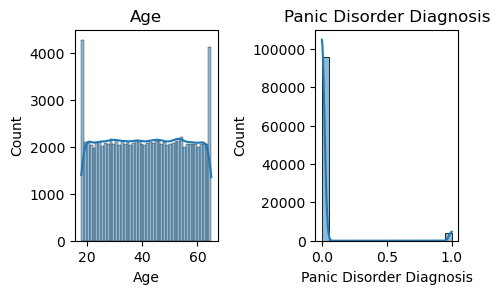

In [32]:
# Histograms for continuous variables
def plot_continuous_distribution(df, columns):
    plt.figure(figsize=(12, 8))
    for col in columns:
        plt.subplot(3, 5, columns.index(col) + 1)
        sns.histplot(df[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()
    
plot_continuous_distribution(df, ['Age', 'Panic Disorder Diagnosis'])

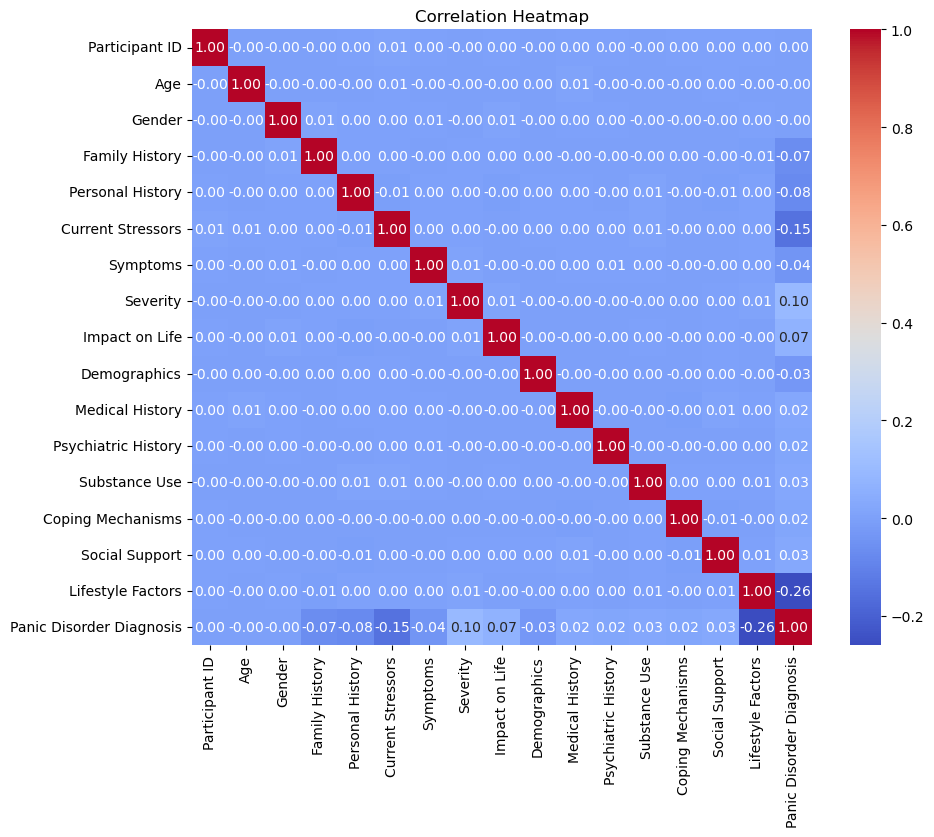

In [31]:
# Heatmap for correlation analysis
def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

# Plot correlation heatmap
plot_correlation_heatmap(df_No)


In [21]:
from tabulate import tabulate

def calculate_statistical_moments(df):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - df (DataFrame): Input DataFrame containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    # Select only the top 12 features
    df = df.iloc[:, :15]
    
    moments = {
        'Mean': df.mean(),
        'Median': df.median(),
        'Standard Deviation': df.std(),
        'Skewness': df.skew(),
        'Kurtosis': df.kurtosis()
    }
    moments_df = pd.DataFrame(moments)
    return moments_df

def display_statistical_moments(df):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - df (DataFrame): Input DataFrame containing features.
    """
    moments_df = calculate_statistical_moments(df)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

# Example usage:
display_statistical_moments(df_No)



Statistical Moments:

+---------------------+---------+----------+----------------------+--------------+------------+
|                     |  Mean   |  Median  |  Standard Deviation  |   Skewness   |  Kurtosis  |
+=====================+=========+==========+======================+==============+============+
|   Participant ID    | 50000.5 | 50000.5  |       28867.7        |      0       |    -1.2    |
+---------------------+---------+----------+----------------------+--------------+------------+
|         Age         | 41.4543 |    41    |       13.8392        | 0.000628005  |  -1.19643  |
+---------------------+---------+----------+----------------------+--------------+------------+
|       Gender        | 0.49948 |    0     |       0.500002       |  0.00208003  |  -2.00004  |
+---------------------+---------+----------+----------------------+--------------+------------+
|   Family History    | 0.49958 |    0     |       0.500002       |  0.00168003  |  -2.00004  |
+----------------

In [11]:
df_No.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Participant ID            100000 non-null  int64
 1   Age                       100000 non-null  int64
 2   Gender                    100000 non-null  int64
 3   Family History            100000 non-null  int64
 4   Personal History          100000 non-null  int64
 5   Current Stressors         100000 non-null  int64
 6   Symptoms                  100000 non-null  int64
 7   Severity                  100000 non-null  int64
 8   Impact on Life            100000 non-null  int64
 9   Demographics              100000 non-null  int64
 10  Medical History           100000 non-null  int64
 11  Psychiatric History       100000 non-null  int64
 12  Substance Use             100000 non-null  int64
 13  Coping Mechanisms         100000 non-null  int64
 14  Social Support       

<p style="background-color:#FFA07A;font-family:Arial, sans-serif;font-size:130%;color:black;text-align:center;border-radius:15px; padding:12px;border: 3px solid #FF6347;">Data Splitting</p>

In [12]:
X=df_No.drop(columns = ['Panic Disorder Diagnosis'] , axis = 1) 
y=df_No['Panic Disorder Diagnosis']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size = 0.2)

In [14]:
X_train.shape

(80000, 16)

In [15]:
y_test.shape

(20000,)

<p style="background-color:#FFA07A;font-family:Arial, sans-serif;font-size:130%;color:black;text-align:center;border-radius:15px; padding:12px;border: 3px solid #FF6347;">Model Building</p>

## SVM
**SVM is suitable for predicting Panic Disorder in this dataset due to its effectiveness in handling high-dimensional data, robust performance in binary classification tasks, and ability to model complex relationships. With 120,000 records split into training and testing sets, SVM's versatility makes it a promising choice for clinical research.**





In [18]:
from sklearn.metrics import classification_report
def svm_classification(X_train, X_test, y_train, y_test):
    """
    Perform SVM classification on the given data.

    Parameters:
    - X_train (array-like): Training features.
    - X_test (array-like): Testing features.
    - y_train (array-like): Training labels.
    - y_test (array-like): Testing labels.

    Returns:
    - y_pred (array-like): Predicted labels.
    """
    # Define transformers and estimator
    tf1_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0, 17))])
    svm = SVC(kernel='linear')

    # Create pipeline
    pipe_svm = Pipeline([('StandardScaler', tf1_lr), ('Support Vector Machine', svm)])

    # Fit pipeline
    pipe_svm.fit(X_train, y_train)

    # Predict labels
    y_pred = pipe_svm.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Return predicted labels
    return y_pred

# Example usage:
y_pred = svm_classification(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19164
           1       0.00      0.00      0.00       836

    accuracy                           0.96     20000
   macro avg       0.48      0.50      0.49     20000
weighted avg       0.92      0.96      0.94     20000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


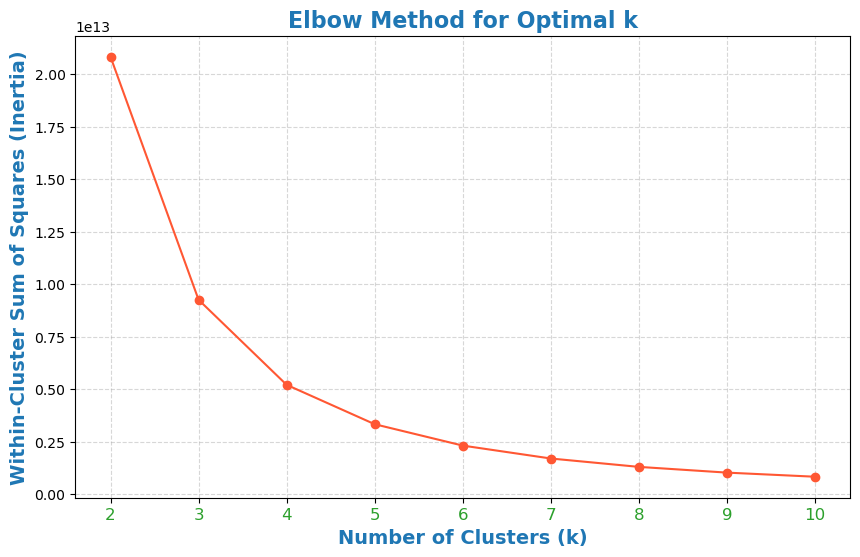

In [41]:
from sklearn.cluster import KMeans
def plot_elbow_curve(X, min_clusters=2, max_clusters=10):
    """
    Plot the elbow curve to determine the optimal number of clusters using the KMeans algorithm.

    Parameters:
    - X (DataFrame): Input features.
    - min_clusters (int): Minimum number of clusters to test.
    - max_clusters (int): Maximum number of clusters to test.

    Returns:
    - None
    """
    # Initialize lists to store inertia values
    inertia_values = []

    # Test different values of k (number of clusters)
    k_values = range(min_clusters, max_clusters + 1)

    # Iterate over each value of k
    for k in k_values:
        # Create KMeans clustering model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)

        # Append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))

    # Customize plot appearance
    plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='#FF5733')  # Line color
    plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold', color='#1f77b4')  # X-axis label
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold', color='#1f77b4')  # Y-axis label
    plt.title('Elbow Method for Optimal k', fontsize=16, fontweight='bold', color='#1f77b4')  # Title
    plt.xticks(k_values, fontsize=12, color='#2ca02c')  # X-axis ticks
    plt.grid(True, linestyle='--', alpha=0.5)  # Grid lines

    plt.show()

plot_elbow_curve(X)

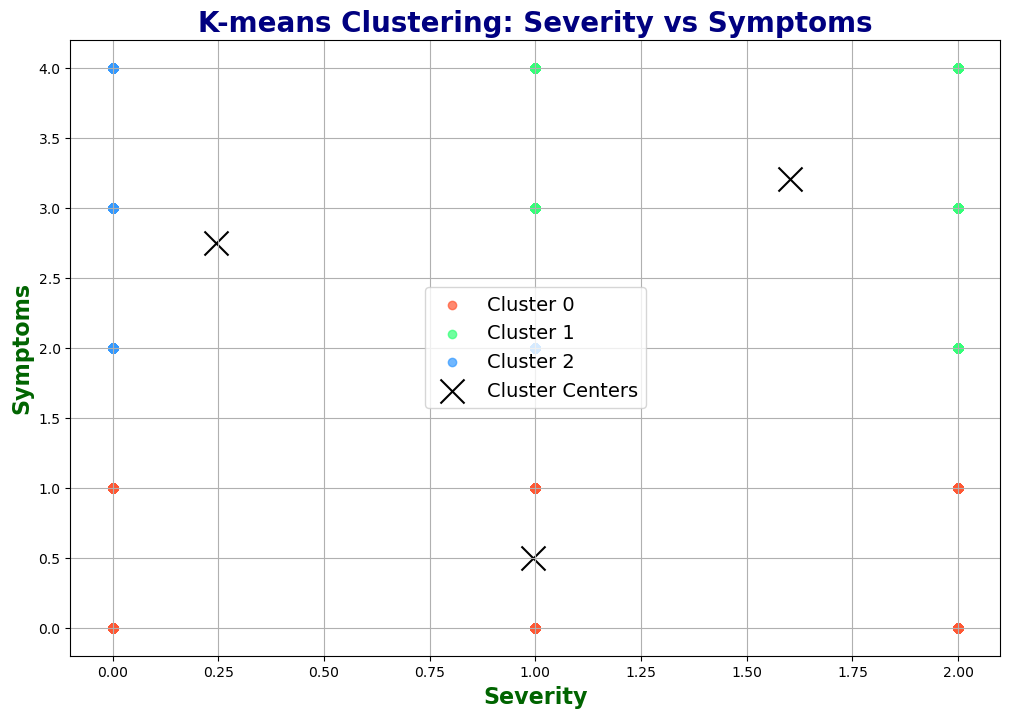

In [42]:
def plot_kmeans_clusters(X, x_col, y_col, num_clusters=2):
    """
    Plot clusters using K-means clustering.

    Parameters:
    - X (DataFrame): Input DataFrame containing features.
    - x_col (str): Column name for x-axis.
    - y_col (str): Column name for y-axis.
    - num_clusters (int): Number of clusters for K-means.

    Returns:
    - None
    """
    # Initialize KMeans model
    km = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit K-means and assign cluster labels
    X['cluster'] = km.fit_predict(X[[x_col, y_col]])
    
    # Plot clusters with cluster centers
    plt.figure(figsize=(12, 8))
    
    # Define colors for each cluster
    colors = ['#FF5733', '#33FF77', '#3399FF', '#FF33EA']
    
    # Plot each cluster using a different color
    for cluster_label, color in zip(sorted(X['cluster'].unique()), colors):
        cluster_data = X[X['cluster'] == cluster_label]
        plt.scatter(cluster_data[x_col], cluster_data[y_col], label=f'Cluster {cluster_label}', alpha=0.7, color=color)
    
    # Plot cluster centers
    cluster_centers = km.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')
    
    # Set plot title and labels
    plt.title(f'K-means Clustering: {x_col} vs {y_col}', fontsize=20, fontweight='bold', color='navy')
    plt.xlabel(x_col, fontsize=16, fontweight='bold', color='darkgreen')
    plt.ylabel(y_col, fontsize=16, fontweight='bold', color='darkgreen')
    
    # Add legend
    plt.legend(fontsize=14)
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Example usage:
plot_kmeans_clusters(X, 'Severity', 'Symptoms', num_clusters=3)

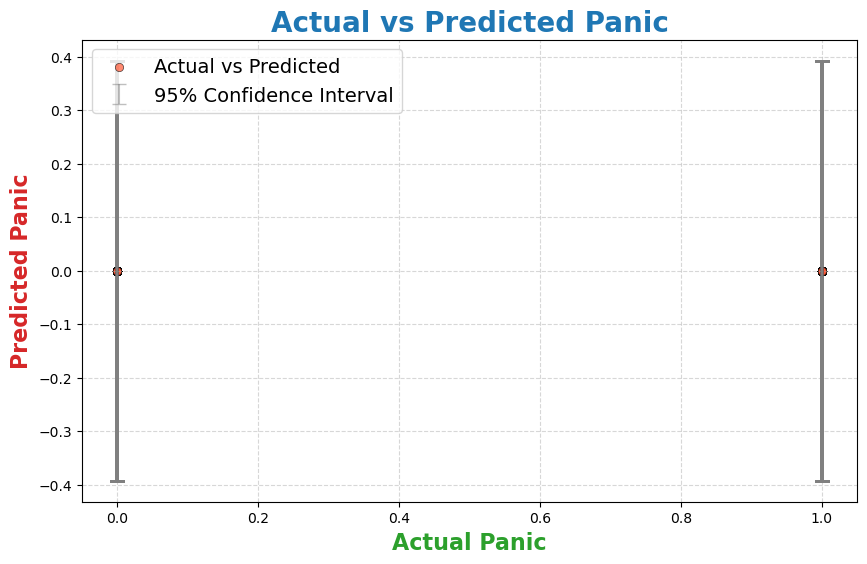

In [48]:
def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot actual vs predicted values with confidence intervals and error bars.

    Parameters:
    - y_test (array-like): Array of actual target values.
    - y_pred (array-like): Array of predicted target values.

    Returns:
    - None
    """
    # Calculate the residuals (difference between actual and predicted values)
    residuals = y_test - y_pred

    # Calculate the standard deviation of the residuals
    std_residuals = np.std(residuals)

    # Calculate the 95% confidence interval for the predicted values
    confidence_interval = 1.96 * std_residuals  # Assuming normal distribution

    # Set up the figure and axes
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual vs predicted values
    scatter = plt.scatter(y_test, y_pred, color='#FF5733', alpha=0.7, label='Actual vs Predicted', edgecolor='black', linewidth=0.5)

    # Plot error bars for confidence interval
    error_bars = plt.errorbar(y_test, y_pred, yerr=confidence_interval, fmt='none', ecolor='#808080', capsize=5, alpha=0.5)

    # Plot the diagonal line for perfect predictions
    plt.plot(y_pred, y_pred, color='#3399FF', linestyle='--', label='Perfect Predictions')

    # Set title and labels
    plt.title('Actual vs Predicted Panic', fontsize=20, fontweight='bold', color='#1f77b4')
    plt.xlabel('Actual Panic', fontsize=16, fontweight='bold', color='#2ca02c')
    plt.ylabel('Predicted Panic', fontsize=16, fontweight='bold', color='#d62728')

    # Add legend with error bars and confidence interval
    plt.legend([scatter, error_bars], ['Actual vs Predicted', '95% Confidence Interval'], loc='upper left', fontsize=14)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.show()

# Example usage:
plot_actual_vs_predicted(y_test, y_pred)
